                 Open       High        Low    Volume      Close  Adj Close
Date                                                                       
2010-06-29  19.000000  25.000000  17.540001  18766300  23.889999  23.889999
2010-06-30  25.790001  30.420000  23.299999  17187100  23.830000  23.830000
2010-07-01  25.000000  25.920000  20.270000   8218800  21.959999  21.959999
2010-07-02  23.000000  23.100000  18.709999   5139800  19.200001  19.200001
2010-07-06  20.000000  20.000000  15.830000   6866900  16.110001  16.110001
2010-07-07  16.400000  16.629999  14.980000   6921700  15.800000  15.800000
2010-07-08  16.139999  17.520000  15.570000   7711400  17.459999  17.459999
2010-07-09  17.580000  17.900000  16.549999   4050600  17.400000  17.400000
2010-07-12  17.950001  18.070000  17.000000   2202500  17.049999  17.049999
2010-07-13  17.389999  18.639999  16.900000   2680100  18.139999  18.139999


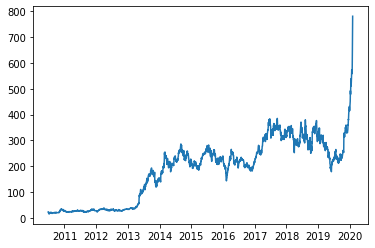

In [277]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Flatten, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 

data = pd.read_csv('TSLA.csv', parse_dates=['Date'], index_col=['Date'])

print(data.head(10))
plt.plot(data['Close'])

In [278]:
x = data[list(data.columns[0:4])]
y = data[list(data.columns[4:5])]
scale = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
samp_x_train = x_train
samp_x_test = x_test
samp_y_train = y_train
samp_y_test = y_test
print(samp_y_train)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

                 Close
Date                  
2016-11-03  187.419998
2018-09-19  299.019989
2011-01-26   24.750000
2015-11-10  216.500000
2017-03-14  258.000000
...                ...
2016-10-10  200.949997
2015-06-09  256.000000
2010-10-25   20.850000
2018-06-21  347.510010
2017-06-30  361.609985

[1932 rows x 1 columns]


In [289]:
def create_model():
    model = Sequential()
    model.add(LSTM(20, input_shape=(4,1), return_sequences=True))
    #model.add(Dense(25, activation = 'linear'))
    model.add(Dropout(0.05))
    model.add(Dense(10, activation = 'linear'))
    model.add(Dense(5, activation = 'linear'))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
    return model

Train on 1932 samples, validate on 484 samples
Epoch 1/500
1932/1932 - 4s - loss: 48826.9984 - mse: 48827.0039 - val_loss: 47583.4646 - val_mse: 47583.4688
Epoch 2/500
1932/1932 - 1s - loss: 45023.1463 - mse: 45023.1406 - val_loss: 38186.3916 - val_mse: 38186.3906
Epoch 3/500
1932/1932 - 1s - loss: 29131.6781 - mse: 29131.6836 - val_loss: 19694.5906 - val_mse: 19694.5918
Epoch 4/500
1932/1932 - 1s - loss: 12293.9422 - mse: 12293.9453 - val_loss: 7259.9523 - val_mse: 7259.9521
Epoch 5/500
1932/1932 - 1s - loss: 4458.1883 - mse: 4458.1890 - val_loss: 3978.6760 - val_mse: 3978.6760
Epoch 6/500
1932/1932 - 1s - loss: 2847.8782 - mse: 2847.8784 - val_loss: 3265.3536 - val_mse: 3265.3535
Epoch 7/500
1932/1932 - 1s - loss: 2147.3342 - mse: 2147.3337 - val_loss: 2365.5002 - val_mse: 2365.5000
Epoch 8/500
1932/1932 - 1s - loss: 1393.3532 - mse: 1393.3534 - val_loss: 1730.1821 - val_mse: 1730.1821
Epoch 9/500
1932/1932 - 1s - loss: 962.1222 - mse: 962.1223 - val_loss: 1430.6357 - val_mse: 1430.6

Epoch 81/500
1932/1932 - 1s - loss: 123.6105 - mse: 123.6105 - val_loss: 118.8849 - val_mse: 118.8849
Epoch 82/500
1932/1932 - 1s - loss: 127.8638 - mse: 127.8638 - val_loss: 124.3021 - val_mse: 124.3021
Epoch 83/500
1932/1932 - 1s - loss: 134.0855 - mse: 134.0855 - val_loss: 113.5113 - val_mse: 113.5113
Epoch 84/500
1932/1932 - 1s - loss: 132.8830 - mse: 132.8830 - val_loss: 123.8493 - val_mse: 123.8493
Epoch 85/500
1932/1932 - 1s - loss: 131.5443 - mse: 131.5443 - val_loss: 111.2519 - val_mse: 111.2519
Epoch 86/500
1932/1932 - 1s - loss: 120.3990 - mse: 120.3990 - val_loss: 110.0775 - val_mse: 110.0775
Epoch 87/500
1932/1932 - 1s - loss: 124.3892 - mse: 124.3892 - val_loss: 115.3415 - val_mse: 115.3415
Epoch 88/500
1932/1932 - 1s - loss: 133.3056 - mse: 133.3056 - val_loss: 107.3380 - val_mse: 107.3380
Epoch 89/500
1932/1932 - 1s - loss: 123.4713 - mse: 123.4713 - val_loss: 102.5354 - val_mse: 102.5354
Epoch 90/500
1932/1932 - 1s - loss: 126.5001 - mse: 126.5001 - val_loss: 118.7073 

Epoch 163/500
1932/1932 - 1s - loss: 82.8090 - mse: 82.8090 - val_loss: 73.9841 - val_mse: 73.9841
Epoch 164/500
1932/1932 - 1s - loss: 88.9392 - mse: 88.9392 - val_loss: 78.2552 - val_mse: 78.2552
Epoch 165/500
1932/1932 - 1s - loss: 88.4756 - mse: 88.4755 - val_loss: 73.1202 - val_mse: 73.1201
Epoch 166/500
1932/1932 - 1s - loss: 98.5120 - mse: 98.5120 - val_loss: 70.9249 - val_mse: 70.9249
Epoch 167/500
1932/1932 - 1s - loss: 83.1043 - mse: 83.1043 - val_loss: 79.3255 - val_mse: 79.3255
Epoch 168/500
1932/1932 - 1s - loss: 84.4784 - mse: 84.4784 - val_loss: 77.7882 - val_mse: 77.7882
Epoch 169/500
1932/1932 - 1s - loss: 86.8749 - mse: 86.8749 - val_loss: 73.3342 - val_mse: 73.3342
Epoch 170/500
1932/1932 - 1s - loss: 85.9132 - mse: 85.9132 - val_loss: 78.0152 - val_mse: 78.0152
Epoch 171/500
1932/1932 - 1s - loss: 86.7334 - mse: 86.7334 - val_loss: 71.1133 - val_mse: 71.1133
Epoch 172/500
1932/1932 - 1s - loss: 82.6056 - mse: 82.6056 - val_loss: 82.1356 - val_mse: 82.1356
Epoch 173/

Epoch 246/500
1932/1932 - 1s - loss: 59.6753 - mse: 59.6753 - val_loss: 62.1566 - val_mse: 62.1566
Epoch 247/500
1932/1932 - 1s - loss: 60.0527 - mse: 60.0527 - val_loss: 69.5884 - val_mse: 69.5884
Epoch 248/500
1932/1932 - 1s - loss: 64.9266 - mse: 64.9266 - val_loss: 51.6044 - val_mse: 51.6044
Epoch 249/500
1932/1932 - 1s - loss: 65.8464 - mse: 65.8464 - val_loss: 60.3558 - val_mse: 60.3558
Epoch 250/500
1932/1932 - 1s - loss: 62.8996 - mse: 62.8996 - val_loss: 52.4320 - val_mse: 52.4320
Epoch 251/500
1932/1932 - 1s - loss: 70.8770 - mse: 70.8770 - val_loss: 48.4315 - val_mse: 48.4315
Epoch 252/500
1932/1932 - 1s - loss: 61.8650 - mse: 61.8650 - val_loss: 50.2482 - val_mse: 50.2482
Epoch 253/500
1932/1932 - 1s - loss: 60.1364 - mse: 60.1364 - val_loss: 61.2237 - val_mse: 61.2237
Epoch 254/500
1932/1932 - 1s - loss: 61.8304 - mse: 61.8304 - val_loss: 55.6547 - val_mse: 55.6547
Epoch 255/500
1932/1932 - 1s - loss: 61.4051 - mse: 61.4051 - val_loss: 54.3831 - val_mse: 54.3831
Epoch 256/

Epoch 329/500
1932/1932 - 1s - loss: 55.6918 - mse: 55.6918 - val_loss: 41.8018 - val_mse: 41.8018
Epoch 330/500
1932/1932 - 1s - loss: 54.5635 - mse: 54.5635 - val_loss: 37.9520 - val_mse: 37.9520
Epoch 331/500
1932/1932 - 1s - loss: 57.6621 - mse: 57.6621 - val_loss: 46.3034 - val_mse: 46.3034
Epoch 332/500
1932/1932 - 1s - loss: 57.1587 - mse: 57.1587 - val_loss: 46.0583 - val_mse: 46.0583
Epoch 333/500
1932/1932 - 1s - loss: 58.9629 - mse: 58.9629 - val_loss: 50.1826 - val_mse: 50.1826
Epoch 334/500
1932/1932 - 1s - loss: 62.2675 - mse: 62.2675 - val_loss: 43.7392 - val_mse: 43.7392
Epoch 335/500
1932/1932 - 1s - loss: 61.7367 - mse: 61.7367 - val_loss: 41.9487 - val_mse: 41.9487
Epoch 336/500
1932/1932 - 1s - loss: 55.7561 - mse: 55.7561 - val_loss: 48.5462 - val_mse: 48.5462
Epoch 337/500
1932/1932 - 1s - loss: 52.8932 - mse: 52.8932 - val_loss: 47.0622 - val_mse: 47.0622
Epoch 338/500
1932/1932 - 1s - loss: 55.9533 - mse: 55.9533 - val_loss: 44.0855 - val_mse: 44.0855
Epoch 339/

Epoch 412/500
1932/1932 - 1s - loss: 51.3386 - mse: 51.3386 - val_loss: 36.0020 - val_mse: 36.0020
Epoch 413/500
1932/1932 - 1s - loss: 54.0378 - mse: 54.0378 - val_loss: 43.4791 - val_mse: 43.4791
Epoch 414/500
1932/1932 - 1s - loss: 47.7638 - mse: 47.7638 - val_loss: 40.1082 - val_mse: 40.1082
Epoch 415/500
1932/1932 - 1s - loss: 50.7820 - mse: 50.7820 - val_loss: 31.8523 - val_mse: 31.8523
Epoch 416/500
1932/1932 - 1s - loss: 46.7058 - mse: 46.7058 - val_loss: 30.0921 - val_mse: 30.0921
Epoch 417/500
1932/1932 - 1s - loss: 53.5891 - mse: 53.5891 - val_loss: 35.7181 - val_mse: 35.7181
Epoch 418/500
1932/1932 - 1s - loss: 46.8935 - mse: 46.8936 - val_loss: 35.4736 - val_mse: 35.4736
Epoch 419/500
1932/1932 - 1s - loss: 54.7475 - mse: 54.7475 - val_loss: 29.2063 - val_mse: 29.2063
Epoch 420/500
1932/1932 - 1s - loss: 56.6324 - mse: 56.6324 - val_loss: 34.7754 - val_mse: 34.7754
Epoch 421/500
1932/1932 - 1s - loss: 59.9673 - mse: 59.9673 - val_loss: 39.1380 - val_mse: 39.1380
Epoch 422/

Epoch 495/500
1932/1932 - 1s - loss: 47.2820 - mse: 47.2820 - val_loss: 34.8645 - val_mse: 34.8645
Epoch 496/500
1932/1932 - 1s - loss: 51.0342 - mse: 51.0342 - val_loss: 40.7839 - val_mse: 40.7839
Epoch 497/500
1932/1932 - 1s - loss: 45.3411 - mse: 45.3411 - val_loss: 28.7670 - val_mse: 28.7670
Epoch 498/500
1932/1932 - 1s - loss: 47.1466 - mse: 47.1466 - val_loss: 26.0538 - val_mse: 26.0538
Epoch 499/500
1932/1932 - 1s - loss: 48.8897 - mse: 48.8897 - val_loss: 31.8178 - val_mse: 31.8178
Epoch 500/500
1932/1932 - 1s - loss: 46.0751 - mse: 46.0751 - val_loss: 23.4366 - val_mse: 23.4366


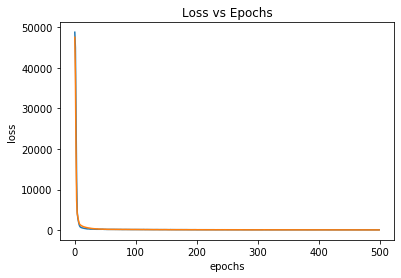

In [290]:
clf = create_model()
#estimator = KerasRegressor(build_fn=create_model, epochs=10, verbose = 2)
model = clf.fit(x_train, y_train, batch_size = 32, epochs = 500, verbose = 2, validation_data = (x_test,y_test))
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.show()

/Users/dev/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


                 Close
Date                  
2010-06-29   24.281036
2010-06-30   30.131752
2010-07-01   25.715904
2010-07-02   22.964359
2010-07-06   20.572483
...                ...
2020-01-28  569.297668
2020-01-29  582.814087
2020-01-30  637.415588
2020-01-31  636.181824
2020-02-03  696.490906

[2416 rows x 1 columns]


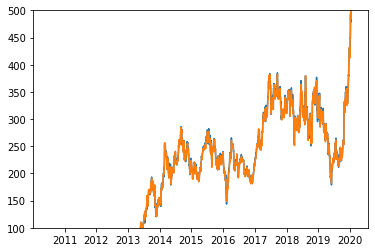

In [298]:
trainPredict = clf.predict(x_train)
testPredict = clf.predict(x_test)
df = pd.DataFrame(data = trainPredict, columns=['data'])
df1 = pd.DataFrame(data = testPredict, columns=['data'])
for i in range(0,len(samp_y_train)):
    samp_y_train['Close'][i] = df['data'][i]
for i in range(0,len(samp_y_test)):
    samp_y_test['Close'][i] = df1['data'][i]
overall = pd.concat([samp_y_train, samp_y_test])
overall = overall.sort_index()
print(overall)
axes = plt.gca()
axes.set_ylim([100,500])
plt.plot(data['Close'])
plt.plot(overall['Close'])

In [299]:
test = np.array([[768.8, 783.5, 758, 11697470]])
test = scale.transform(test)
temp = test.reshape((test.shape[0], test.shape[1], 1))
ans = clf.predict(temp)
ans

array([[718.58716]], dtype=float32)

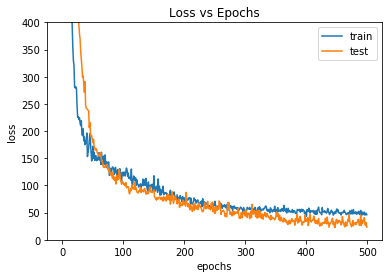

In [293]:
axes = plt.gca()
axes.set_ylim([0,400])
plt.plot(model.history['loss'], label = 'train')
plt.plot(model.history['val_loss'], label = 'test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend(loc="upper right")
plt.show()